#### First function, directly copied from python and translated to julia

In [7]:
lower = 1
upper = 10^7

primes = []

@time for num=lower:upper
    if num > 1
        n = 0
        for i=2:floor(Int, sqrt(num))
            
            if (num % i) == 0
                n += 1
                break
            end
        end
        if n == 0
            push!(primes,num)
        end
    end 
end

print(size(primes))

#238.363645 seconds (4.82 G allocations: 98.116 GiB, 20.23% gc time)
#(664579,)

238.363645 seconds (4.82 G allocations: 98.116 GiB, 20.23% gc time)
(664579,)

#### Enclose the above given loop in a function. This drastically changes the performance 

In [42]:
function primes_find()
    lower = 1
    upper = 10^6

    primes = []



    for num=lower:upper
        if num > 1
            n = 0
            for i=2:floor(Int, sqrt(num))
                
                if (num % i) == 0
                    n += 1
                    break
                end
            end
            if n == 0
                push!(primes,num)
            end
        end 
    end

    return primes
end

@time primes_find()

# This time also includes the time of printing/returning the array to the screen
#4.697426 seconds (664.50 k allocations: 19.921 MiB, 1.32% gc time) #for 10^7
#45.065760 seconds (3.00 M allocations: 82.961 MiB, 0.13% gc time) #for 5*10^7

#664579-element Vector{Any}:


  0.222669 seconds (78.41 k allocations: 3.024 MiB)


78498-element Vector{Any}:
      2
      3
      5
      7
     11
     13
     17
     19
     23
     29
      ⋮
 999883
 999907
 999917
 999931
 999953
 999959
 999961
 999979
 999983

#### Let's now change the way our function looks a bit. Bit more cleaner

In [3]:
function prime_check(num)
    if num > 1
        for i=2:floor(Int, sqrt(num))
            if (num % i) == 0
                return false
            end
        end
        return true    
    end 
end

prime_check (generic function with 1 method)

In [10]:
print(prime_check(4)," ",prime_check(13)) # It works!

false true

In [29]:
function list_primes(lower,upper)
    primes = []
    for i=lower:upper
        if prime_check(i) == true
            push!(primes,i)
        end
    end
    #return primes
end

@time list_primes(1,10^7)

# Oh damn...
#4.639027 seconds (664.50 k allocations: 19.921 MiB) #10^7
#664579-element Vector{Any}:

  4.768161 seconds (664.50 k allocations: 19.921 MiB, 0.62% gc time)


In [18]:
num = [10^i for i=1:7]
push!(num,5*10^7)
#time = [@time list_primes(1,i) for i in num]
time = [0.000004,0.000004, 0.000033 ,0.000501 ,0.009267 ,0.193072,4.650086,45.065760]  

8-element Vector{Float64}:
  4.0e-6
  4.0e-6
  3.3e-5
  0.000501
  0.009267
  0.193072
  4.650086
 45.06576

In [14]:
using Plots

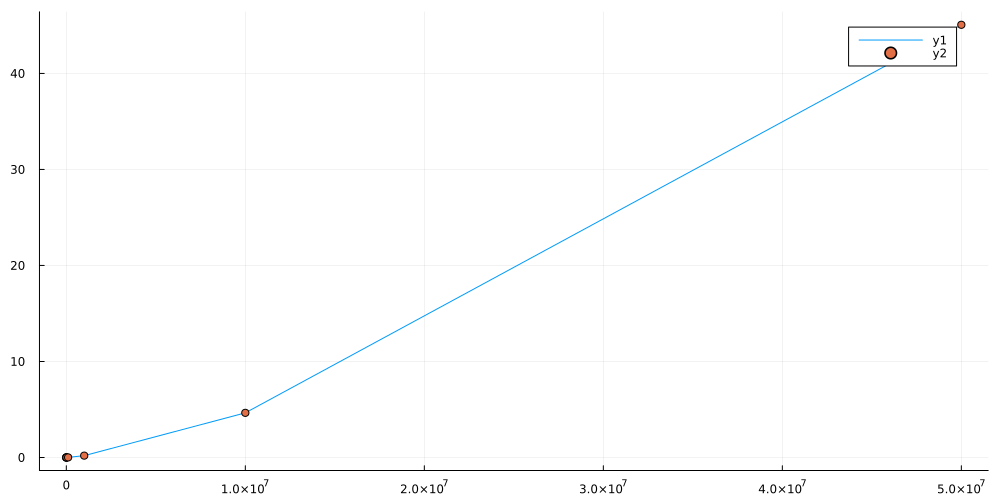

In [22]:
plot(num,time,size=(1000,500))
scatter!(num,time,size=(1000,500))
#savefig("plot_numvstime.png") 

In [5]:
function list_primes_new(lower,upper)
    primes = zeros(floor(Int,(upper/(log(upper)) )*(1+1.2762/log(upper)) ))
    j = 1
    for i=lower:upper
        if prime_check(i) == true
            #push!(primes,i)
            primes[j] = i
            j += 1
        end
    end
    #return primes
    #return filter(!iszero, primes)
end
#45.082667 seconds (2 allocations: 23.068 MiB)

list_primes_new (generic function with 1 method)

In [23]:
@time list_primes_new(1,10^8)

 12.116091 seconds (16.35 M allocations: 293.739 MiB, 0.44% gc time)


In [7]:
using Primes

https://github.com/JuliaMath/Primes.jl/blob/master/src/Primes.jl <br/>
link to the source code

```julia
function isprime(n::Integer)
    # Small precomputed primes + Miller-Rabin for primality testing:
    #     https://en.wikipedia.org/wiki/Miller–Rabin_primality_test
    #     https://github.com/JuliaLang/julia/issues/11594
    n < 2 && return false
    trailing_zeros(n) > 0 && return n==2
    if n < N_SMALL_FACTORS
        return _min_factor(n) == n
    end
    for m in (3, 5, 7, 11, 13, 17, 19, 23)
        n % m == 0 && return false
    end
    s = trailing_zeros(n - 1)
    d = (n - 1) >>> s
    for a in witnesses(n)::Tuple{Vararg{Int}}
        x = powermod(a, d, n)
        x == 1 && continue
        t = s
        while x != n - 1
            (t -= 1) ≤ 0 && return false
            x = oftype(n, widemul(x, x) % n)
            x == 1 && return false
        end
    end
    return true
end
```


In [10]:
function list_primes_new(lower,upper)
    primes = zeros(floor(Int,(upper/(log(upper)) )*(1+1.2762/log(upper)) ))
    j = 1
    for i=lower:upper
        if isprime(i) == true
            primes[j] = i
            j += 1
        end
    end
    #return primes
    #return filter(!iszero, primes)
end
#5.771016 seconds (8.17 M allocations: 147.712 MiB, 0.06% gc time)

list_primes_new (generic function with 1 method)

In [24]:
upper = 10^8
zeros(floor(Int,(upper/(log(upper)) )*(1+1.2762/log(upper))  ))

5804784-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0